In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
# Dataset with Indian actors, genres, languages, budget, year, and ratings
data = {
    'Genre': ['Action', 'Comedy', 'Drama', 'Thriller', 'Romance', 'Horror', 'Comedy', 'Action', 'Drama', 'Romance'],
    'Actor': ['Shah Rukh Khan', 'Akshay Kumar', 'Ranbir Kapoor', 'Nawazuddin Siddiqui', 'Alia Bhatt',
              'Radhika Apte', 'Varun Dhawan', 'Prabhas', 'Ayushmann Khurrana', 'Kriti Sanon'],
    'Language': ['Hindi', 'Hindi', 'Hindi', 'Hindi', 'Hindi', 'Hindi', 'Hindi', 'Telugu', 'Hindi', 'Hindi'],
    'Year': [2014, 2017, 2019, 2020, 2016, 2013, 2015, 2022, 2018, 2021],
    'Budget (in millions)': [200, 180, 150, 120, 100, 70, 90, 250, 160, 110],
    'Rating': [8.5, 7.2, 8.1, 7.8, 7.4, 6.3, 6.9, 8.9, 7.7, 7.5]
}

df = pd.DataFrame(data)
df

,Genre,Actor,Language,Year,Budget (in millions),Rating
0,Action,Shah Rukh Khan,Hindi,2014,200,8.5
1,Comedy,Akshay Kumar,Hindi,2017,180,7.2
2,Drama,Ranbir Kapoor,Hindi,2019,150,8.1
3,Thriller,Nawazuddin Siddiqui,Hindi,2020,120,7.8
4,Romance,Alia Bhatt,Hindi,2016,100,7.4
5,Horror,Radhika Apte,Hindi,2013,70,6.3
6,Comedy,Varun Dhawan,Hindi,2015,90,6.9
7,Action,Prabhas,Telugu,2022,250,8.9
8,Drama,Ayushmann Khurrana,Hindi,2018,160,7.7
9,Romance,Kriti Sanon,Hindi,2021,110,7.5


In [17]:
# Features and target
X = df.drop('Rating', axis=1)
y = df['Rating']

# Categorical columns to encode
categorical_features = ['Genre', 'Actor', 'Language']

# ColumnTransformer with:
# 1️⃣ handle_unknown='ignore' to prevent errors for unseen categories in test set
# 2️⃣ force_int_remainder_cols=False to fix FutureWarning in scikit-learn
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough',
    force_int_remainder_cols=False
)

# Pipeline: ColumnTransformer + Linear Regression
model = Pipeline(steps=[
    ('preprocessor', ct),
    ('regressor', LinearRegression())
])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Optional: check shapes
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)

Training Features Shape: (7, 5)
Testing Features Shape: (3, 5)


In [18]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre', 'Actor',
                                                   'Language'])])),
                ('regressor', LinearRegression())])

In [19]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 2))

Mean Squared Error: 0.49
R² Score: -0.46


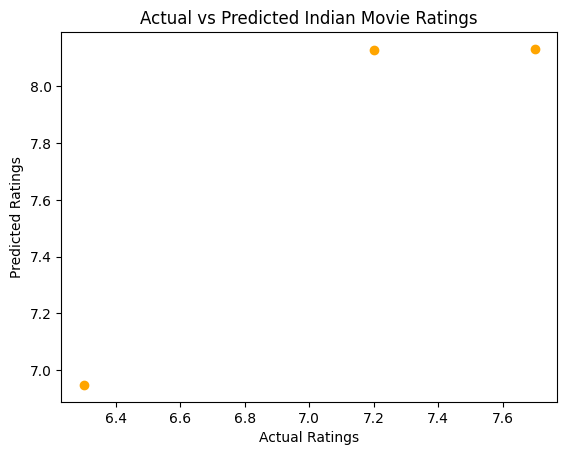

In [20]:
plt.scatter(y_test, y_pred, color='orange')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Indian Movie Ratings")
plt.show()

In [21]:
custom_movie = pd.DataFrame({
    'Genre': ['Romance'],
    'Actor': ['Alia Bhatt'],
    'Language': ['Hindi'],
    'Year': [2023],
    'Budget (in millions)': [220]
})

predicted_rating = model.predict(custom_movie)
print("Predicted IMDb-style Rating for your movie:", round(predicted_rating[0], 2))

Predicted IMDb-style Rating for your movie: 8.89


In [22]:
custom_movies = pd.DataFrame({
    'Genre': ['Action', 'Comedy', 'Romance'],
    'Actor': ['Akshay Kumar', 'Varun Dhawan', 'Alia Bhatt'],
    'Language': ['Hindi', 'Hindi', 'Hindi'],
    'Year': [2024, 2025, 2023],
    'Budget (in millions)': [250, 180, 220]
})

# Predict ratings for all 3 movies
predicted_ratings = model.predict(custom_movies)

# Add predictions to dataframe
custom_movies['Predicted Rating'] = predicted_ratings.round(2)

custom_movies

,Genre,Actor,Language,Year,Budget (in millions),Predicted Rating
0,Action,Akshay Kumar,Hindi,2024,250,9.16
1,Comedy,Varun Dhawan,Hindi,2025,180,8.08
2,Romance,Alia Bhatt,Hindi,2023,220,8.89
